## Observations and Insights

- Based on mean tumor volume, Ramicane is our best candidate for further testing followed closely by Capomulin.
- Mouse weight and tumor volume have a moderately correlated linearly proportional (positive) relationship.
- Ramicane and Capomulin both have interesting outliers below the minimum that warrant further investigation.

## Dependencies and starter code

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mdf = pd.merge(mouse_metadata, study_results, how='inner',on='Mouse ID')
# Combine the data into a single dataset
mdf.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
1186,m550,Ketapril,Male,18,28,10,50.548035,2
1819,y260,Ketapril,Female,7,25,25,54.437562,4
454,a203,Infubinol,Female,20,23,0,45.000000,0
18,s185,Capomulin,Female,3,17,40,25.472143,1
1369,p387,Stelasyn,Male,3,30,40,69.038876,1
1785,x773,Placebo,Female,21,30,35,55.192736,4
965,i669,Placebo,Female,18,27,10,48.281633,1
645,c264,Zoniferol,Female,11,27,35,61.074795,2
275,l897,Capomulin,Male,17,19,10,46.154737,0


## Summary statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
ndf = pd.DataFrame()
ndf['Mean'] = mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
ndf['Median'] = mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
ndf['Variance'] = mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
ndf['Std Dev'] =  mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
ndf['SEM'] =  mdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
ndf

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

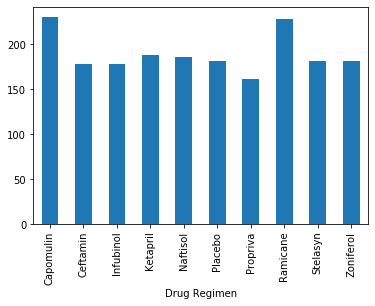

In [87]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
qdf = mdf.groupby('Drug Regimen').count()
qdf['Mouse ID'].plot.bar()

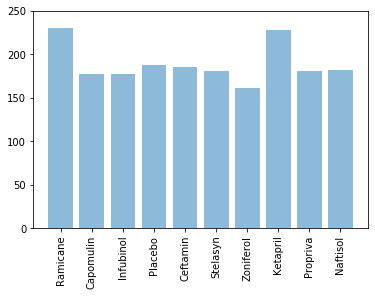

In [42]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
idx = mdf['Drug Regimen'].unique().tolist()
x_axis = np.arange(len(idx))
dps = mdf.groupby('Drug Regimen')['Mouse ID'].count().tolist()
plt.bar(x_axis, dps, align='center', alpha=0.5)
plt.xticks(x_axis, idx, rotation = 90)
plt.yticks([0,50,100,150,200,250])
plt.show()

## Pie plots

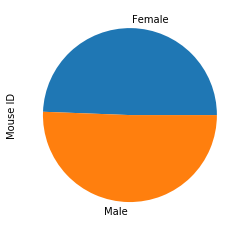

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
s = pd.Series()
s = mdf.groupby('Sex')['Mouse ID'].count()
s.plot.pie()


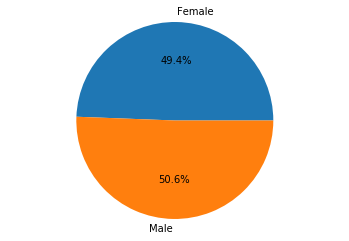

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = mdf.groupby('Sex')['Mouse ID'].count().tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.axis('equal')
plt.show()
r = mdf.groupby('Sex')['Mouse ID'].count()


## Quartiles, outliers and boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# get everything for the final timepoint (45)
tdf = mdf.loc[mdf['Timepoint'] == 45, :]
# most promising will be the 4 with the smallest average (mean) tumor volume
tdf = tdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().sort_values().head(4)
top_four = tdf.index.tolist()

# If the data is in a dataframe, we use pandas to give quartile calculations

top_dict = {
    'Regimen' : [],
    'Median' : [],
    'LowerQ' : [],
    'UpperQ' : [],
    'IQR' : [],
    'Upper Bound' : [],
    'Lower Bound' : []
}

topdf = pd.DataFrame()
plotdf = pd.Series()
plot_list = []

for regimen in top_four:
    top_dict['Regimen'].append(regimen)
    testdf = mdf.loc[mdf['Drug Regimen'] == regimen, :]
    plotdf = testdf['Tumor Volume (mm3)']
    plot_list.append(plotdf)
    top_dict['Median'].append(testdf['Tumor Volume (mm3)'].median())
    quartiles = testdf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    top_dict['LowerQ'].append(quartiles[.25])
    top_dict['UpperQ'].append(quartiles[.75])
    top_dict['IQR'].append(quartiles[.75] - quartiles[.25])

    l = quartiles[.25] - (1.5*(quartiles[.75] - quartiles[.25]))
    u = quartiles[.75] + (1.5*(quartiles[.75] - quartiles[.25]))
    
    top_dict['Lower Bound'].append(l)
    top_dict['Upper Bound'].append(u)
    
top_df = pd.DataFrame.from_dict(top_dict)
top_df

,Regimen,Median,LowerQ,UpperQ,IQR,Upper Bound,Lower Bound
0,Ramicane,40.673236,36.674635,45.000000,8.325365,57.488048,24.186586
1,Capomulin,41.557809,37.685933,45.000000,7.314067,55.971101,26.714832
2,Ceftamin,51.776157,47.208427,56.801438,9.593010,71.190953,32.818911
3,Infubinol,51.820584,47.312353,57.314444,10.002091,72.317580,32.309217


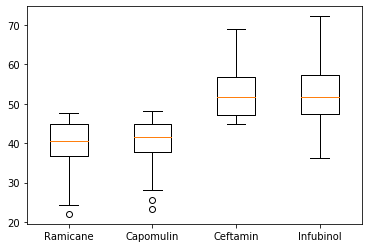

In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#ax = testdf['Tumor Volume (mm3)'].plot.box()
ax = plt.boxplot(plot_list, labels = top_four)

## Line and scatter plots

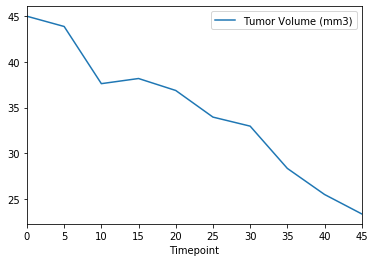

In [90]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cdf = mdf.loc[mdf['Drug Regimen'] == 'Capomulin'].loc[mdf['Mouse ID'] == 's185']
cdf.plot.line('Timepoint', 'Tumor Volume (mm3)')

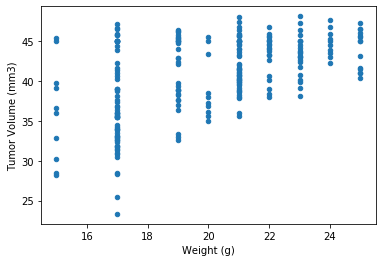

In [48]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
wdf = mdf.loc[mdf['Drug Regimen'] == 'Capomulin']
wdf.groupby('Tumor Volume (mm3)').mean()
wdf.plot.scatter('Weight (g)', 'Tumor Volume (mm3)')

In [49]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [61]:
x_vals = wdf['Weight (g)']
y_vals = wdf['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
print('Regression resulting line is: ' + eq)

Regression resulting line is: y = 0.96x + 21.49


The r-squared value is: 0.5256995552077166


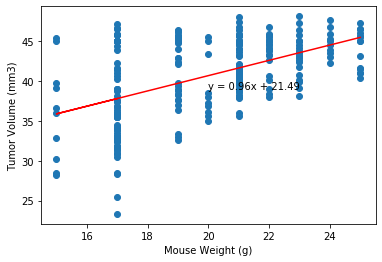

In [77]:
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, regress_vals, 'r-')
plt.annotate(eq, (20, 39), fontsize = 10, color = 'black')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f'The r-squared value is: {rvalue}')
plt.show()